In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [2]:
data = pd.read_csv('CreditCard')
data.head()

,card,reports,age,income,ratio,dependents,owner
0,1.0,0.0,37.66667,4.5200,0.033270,3.0,1.0
1,1.0,0.0,33.25000,2.4200,0.005217,3.0,0.0
2,1.0,0.0,33.66667,4.5000,0.004156,4.0,1.0
3,1.0,0.0,30.50000,2.5400,0.065214,0.0,0.0
4,1.0,0.0,32.16667,9.7867,0.067051,2.0,1.0


In [3]:
data.isna().sum()  #Checking for null values

card          0
reports       0
age           0
income        0
ratio         0
dependents    0
owner         0
dtype: int64

In [4]:
data.describe()

,card,reports,age,income,ratio,dependents,owner
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.775588,0.456406,33.213103,3.365376,0.068732,0.993935,0.440485
std,0.417353,1.345267,10.142783,1.693902,0.094656,1.247745,0.496634
min,0.000000,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000
25%,1.000000,0.000000,25.416670,2.243750,0.002316,0.000000,0.000000
50%,1.000000,0.000000,31.250000,2.900000,0.038827,1.000000,0.000000
75%,1.000000,0.000000,39.416670,4.000000,0.093617,2.000000,1.000000
max,1.000000,14.000000,83.500000,13.500000,0.906320,6.000000,1.000000


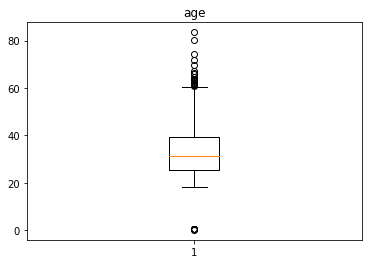

In [5]:
plt.boxplot(data['age'])
plt.title('age')
plt.show()

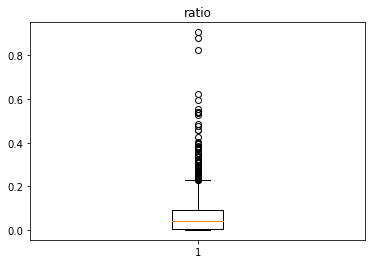

In [6]:
plt.boxplot(data['ratio'])
plt.title('ratio')
plt.show()

array([[<AxesSubplot:title={'center':'reports'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'ratio'}>],
       [<AxesSubplot:title={'center':'dependents'}>,
        <AxesSubplot:title={'center':'owner'}>]], dtype=object)

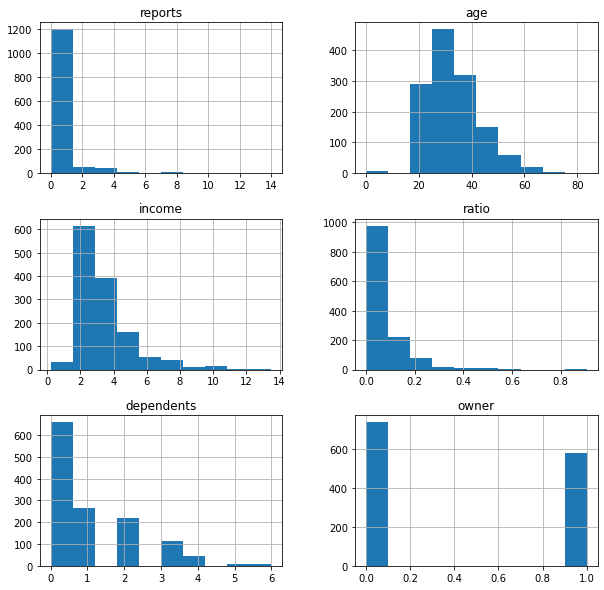

In [7]:
data[['reports','age','income','ratio','dependents','owner']].hist(figsize=(10,10))

In [8]:
data = data[data['age']>1] # remove outlier: age<1

In [9]:
data.describe()

,card,reports,age,income,ratio,dependents,owner
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,0.775152,0.458079,33.387386,3.367257,0.068636,0.993902,0.441311
std,0.417641,1.348416,9.884200,1.697377,0.094787,1.247408,0.496733
min,0.000000,0.000000,18.166670,0.210000,0.000109,0.000000,0.000000
25%,1.000000,0.000000,25.416670,2.237125,0.002208,0.000000,0.000000
50%,1.000000,0.000000,31.291665,2.900000,0.038775,1.000000,0.000000
75%,1.000000,0.000000,39.416670,4.000000,0.093516,2.000000,1.000000
max,1.000000,14.000000,83.500000,13.500000,0.906320,6.000000,1.000000


Text(0.5, 1.0, 'log(ratio)')

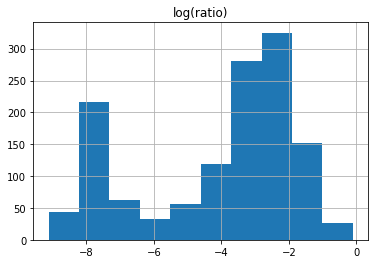

In [10]:
# log transformation of ratio
log_ratio = np.log(data['ratio'])
np.log(data['ratio']).hist()
plt.title('log(ratio)')

Text(0.5, 1.0, 'log(reports+1)')

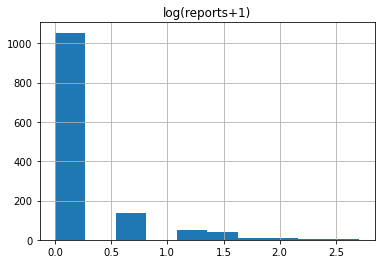

In [11]:
# log transformation of reports 
log_reports = np.log(1+data['reports'])
np.log(1+data['reports']).hist()
plt.title('log(reports+1)')

In [12]:
data['log ratio'] = log_ratio # include the transformed data
data['log reports'] = log_reports

In [13]:
data.head()

,card,reports,age,income,ratio,dependents,owner,log ratio,log reports
0,1.0,0.0,37.66667,4.5200,0.033270,3.0,1.0,-3.403102,0.0
1,1.0,0.0,33.25000,2.4200,0.005217,3.0,0.0,-5.255844,0.0
2,1.0,0.0,33.66667,4.5000,0.004156,4.0,1.0,-5.483309,0.0
3,1.0,0.0,30.50000,2.5400,0.065214,0.0,0.0,-2.730084,0.0
4,1.0,0.0,32.16667,9.7867,0.067051,2.0,1.0,-2.702308,0.0


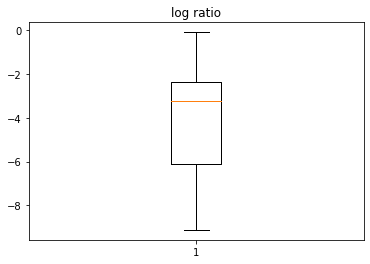

In [14]:
plt.boxplot(data['log ratio'])
plt.title('log ratio')
plt.show()

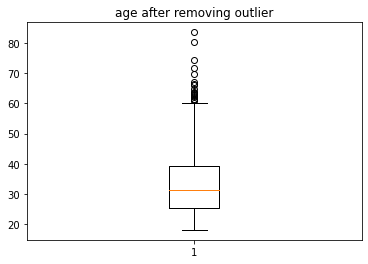

In [15]:
plt.boxplot(data['age'])
plt.title('age after removing outlier')
plt.show()

# Training set and testing set: random splitting

In [16]:
from sklearn.model_selection import train_test_split

data_train,data_test = train_test_split(data,test_size=0.3,random_state=0)

X_train = data_train[['age','income','dependents','owner','log ratio','log reports']]
y_train = data_train['card']

X_test = data_test[['age','income','dependents','owner','log ratio','log reports']]
y_test = data_test['card']

len(X_test),len(X_train),len(y_train),len(y_test)

(394, 918, 918, 394)

In [17]:
y_train.value_counts() 

1.0    706
0.0    212
Name: card, dtype: int64

# let's use a very simple model with only income as feature

In [18]:
X0_train = X_train[['income']]
X0_test = X_test[['income']]

In [19]:
import statsmodels.api as sm

logit0 = sm.Logit(y_train, sm.add_constant(X0_train)).fit()
logit0.summary()

Optimization terminated successfully.
         Current function value: 0.535986
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   card   No. Observations:                  918
Model:                          Logit   Df Residuals:                      916
Method:                           MLE   Df Model:                            1
Date:                Thu, 26 Oct 2023   Pseudo R-squ.:                0.008179
Time:                        01:03:25   Log-Likelihood:                -492.03
converged:                       True   LL-Null:                       -496.09
Covariance Type:            nonrobust   LLR p-value:                  0.004389
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7358      0.185      3.985      0.000       0.374       1.098
income         0.1417      0.052      2.705      0.007       0.039       0.244
==============================================================================
"""

In [20]:
print(logit0.aic)
print(logit0.bic)

988.0697886736436
997.7141834548846


In [21]:
# scikit-learn package
logit = LogisticRegression(solver='lbfgs')
logit.fit(X0_train,y_train)
predict0 = logit.predict(X0_test)
predictt0 = logit.predict(X0_train)

In [22]:
prob_test0 = logit.predict_proba(X0_test)[:,1]
# print(prob_test.reshape(1,-1))
prob_train0 = logit.predict_proba(X0_train)[:,1]
#print(prob_train.reshape(1,-1))

In [23]:
accuracy_score(y_test,predict0)

0.7893401015228426

In [1]:
confusion_matrix(y_test,predict0)

NameError: name 'confusion_matrix' is not defined

In [25]:
print(classification_report(y_test,predict0))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        83
         1.0       0.79      1.00      0.88       311

    accuracy                           0.79       394
   macro avg       0.39      0.50      0.44       394
weighted avg       0.62      0.79      0.70       394



//anaconda/envs/lqr_test/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# can use different thresholds when predicting the outcome
y_test_pred = pd.Series([1 if x > 0.8 else 0 for x in prob_test0]) 

cm = confusion_matrix(y_test, y_test_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[ 75   8]
 [264  47]]


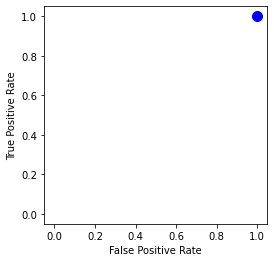

In [27]:
plt.figure(figsize=(4,4))
x=[1]
y=[1]
plt.plot(x,y,'bo',markersize=10)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

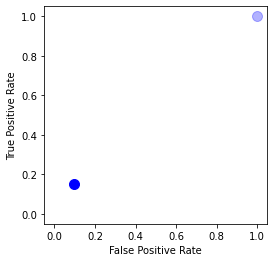

In [28]:
plt.figure(figsize=(4,4))
x=[1]
y=[1]
plt.plot(x,y,'bo', markersize=10,alpha=0.3)
x=[0.0964]
y=[0.1511]
plt.plot(x,y,marker="o", color="blue",markersize=10)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

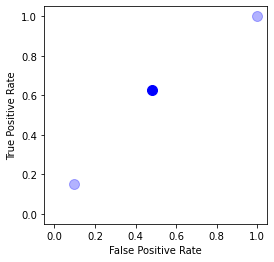

In [29]:
plt.figure(figsize=(4,4))
x=[1,0.0964]
y=[1,0.1511]
plt.plot(x,y,'bo', markersize=10,alpha=0.3)
x=[0.4819]
y=[0.6270]
plt.plot(x,y,marker="o", color="blue",markersize=10)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

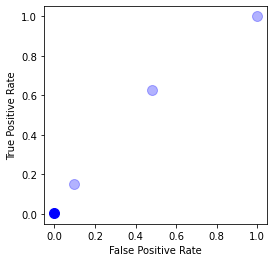

In [30]:
plt.figure(figsize=(4,4))
x=[1,0.0964,0.4819]
y=[1,0.1511,0.6270]
plt.plot(x,y,'bo', markersize=10,alpha=0.3)
x=[0]
y=[0.0064]
plt.plot(x,y,marker="o", color="blue",markersize=10)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## ROC

In [31]:
roc_auc_train0 = roc_auc_score(y_train,predictt0)
fpr0, tpr0, threshold0 = roc_curve(pd.to_numeric(y_train),prob_train0)
roc_auc0 = auc(fpr0,tpr0)

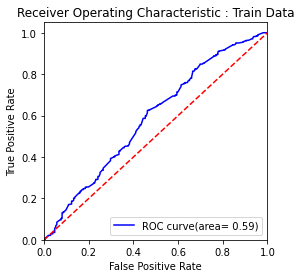

In [32]:
plt.figure(figsize=(4,4))
plt.plot(fpr0,tpr0,color ='blue',label='ROC curve(area= %0.2f)'%(roc_auc0))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic : Train Data")
plt.legend(loc='lower right')
plt.show()

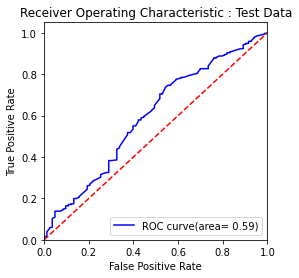

In [33]:
roc_auc_test0 = roc_auc_score(y_test,predict0)
fpr0, tpr0, threshold0 = roc_curve(pd.to_numeric(y_test),prob_test0)
roc_auc0 = auc(fpr0,tpr0)

plt.figure(figsize=(4,4))
plt.plot(fpr0,tpr0,color ='blue',label='ROC curve(area= %0.2f)'%(roc_auc0))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic : Test Data")
plt.legend(loc='lower right')
plt.show()

# use all features

In [34]:
# use all features
logit1 = sm.Logit(y_train, sm.add_constant(X_train)).fit()
logit1.summary()

Optimization terminated successfully.
         Current function value: 0.053611
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   card   No. Observations:                  918
Model:                          Logit   Df Residuals:                      911
Method:                           MLE   Df Model:                            6
Date:                Thu, 26 Oct 2023   Pseudo R-squ.:                  0.9008
Time:                        01:03:27   Log-Likelihood:                -49.215
converged:                       True   LL-Null:                       -496.09
Covariance Type:            nonrobust   LLR p-value:                8.407e-190
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.7527      3.991      4.949      0.000      11.930      27.575
age             0.0184      0.029      0.635      0.526      -0.038       0.075
income          0.7541      0.198      3.813      0.000       0.366       1.142
dependents     -0.4426      0.286     -1.546      0.122      -1.004       0.119
owner          -0.1430      0.710     -0.201      0.840      -1.535       1.249
log ratio       3.1469      0.574      5.479      0.000       2.021       4.273
log reports    -3.8152      1.784     -2.138      0.033      -7.313      -0.318
===============================================================================

Possibly complete quasi-separation: A fraction 0.66 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [35]:
print(logit1.aic)
print(logit1.bic)

112.42919296642245
146.1845747007659


## remove non-significant variables: age, dependents and owner

In [36]:
X_train_new = X_train[['income','log ratio','log reports']]
X_test_new = X_test[['income','log ratio','log reports']]

In [37]:
logit2 = sm.Logit(y_train, sm.add_constant(X_train_new)).fit()
logit2.summary()

Optimization terminated successfully.
         Current function value: 0.055510
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   card   No. Observations:                  918
Model:                          Logit   Df Residuals:                      914
Method:                           MLE   Df Model:                            3
Date:                Thu, 26 Oct 2023   Pseudo R-squ.:                  0.8973
Time:                        01:03:27   Log-Likelihood:                -50.958
converged:                       True   LL-Null:                       -496.09
Covariance Type:            nonrobust   LLR p-value:                1.142e-192
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.3545      3.870      5.002      0.000      11.770      26.939
income          0.7272      0.187      3.896      0.000       0.361       1.093
log ratio       3.0502      0.561      5.435      0.000       1.950       4.150
log reports    -3.9095      1.778     -2.199      0.028      -7.395      -0.424
===============================================================================

Possibly complete quasi-separation: A fraction 0.66 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [38]:
print(logit2.aic)
print(logit2.bic)

109.91549233320954
129.2042818956915


In [39]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(solver='lbfgs')
logit.fit(X_train_new,y_train)
predict2 = logit.predict(X_test_new)
predictt2 = logit.predict(X_train_new)

In [40]:
prob_test2 = logit.predict_proba(X_test_new)[:,1]
prob_train2 = logit.predict_proba(X_train_new)[:,1]

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict2)

0.9822335025380711

In [42]:
from sklearn.metrics import confusion_matrix
print("confusion matrix \n",confusion_matrix(y_test,predict2))

confusion matrix 
 [[ 83   0]
 [  7 304]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict2))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        83
         1.0       1.00      0.98      0.99       311

    accuracy                           0.98       394
   macro avg       0.96      0.99      0.97       394
weighted avg       0.98      0.98      0.98       394



In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

roc_auc_test = roc_auc_score(y_test,predict2)
fpr2, tpr2, threshold2 = roc_curve(pd.to_numeric(y_test),prob_test2)
roc_auc2 = auc(fpr2,tpr2)

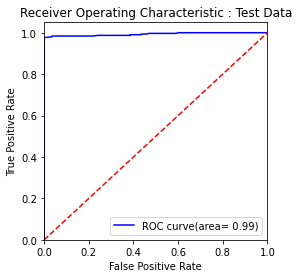

In [45]:
plt.figure(figsize=(4,4))
plt.plot(fpr2,tpr2,color ='blue',label='ROC curve(area= %0.2f)'%(roc_auc2))
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic : Test Data")
plt.legend(loc='lower right')
plt.show()